<a href="https://colab.research.google.com/github/MrJenish/woc5.0-ml-weather-prediction-case-study-Jenish-Mangukiya/blob/main/WOC5_0_ML_Checkpoint_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import python library**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from tensorflow.keras.layers import Normalization

In [3]:
from tensorflow.keras import layers

**Load the data set**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")

In [5]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [6]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [7]:
df.weather.replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4],inplace=True)

In [8]:
df.weather.value_counts()

1    641
2    640
4    101
0     53
3     26
Name: weather, dtype: int64

**Define input and output parameter**

In [9]:
input = df.drop(['weather'],axis=1)
output = df.weather

In [10]:
input.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [11]:
output.head()

0    0
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

**Split the data set into train and test**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(input,output,test_size=0.2,random_state=42)

In [13]:
print('x_train size : ',str(x_train.shape))
print('x_test size : ',str(x_test.shape))
print('y_train size : ',str(y_train.shape))
print('y_test size : ',str(y_test.shape))

x_train size :  (1168, 4)
x_test size :  (293, 4)
y_train size :  (1168,)
y_test size :  (293,)


# **Create model**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Activation, Dense

In [15]:
model = tf.keras.models.Sequential([
    Dense(100,input_shape=(4,),activation='relu'),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(50,activation='relu'),
    Dense(50,activation='relu'),
    Dense(5,activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 28,555
Trainable params: 28,555
Non-traina

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=200,verbose=0)

**Print the accurancy of the model**

In [19]:
_,accurancy = model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.8225


In [20]:
accurancy

0.8225256204605103

In [21]:
Dict = {0:'drizzle',1:'rain',2:'sun',3:'snow',4:'fog'}

In [22]:
y_pre = model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [23]:
y_pre

array([[3.2972276e-02, 9.9323057e-03, 8.8232416e-01, 2.1479616e-06,
        7.4769124e-02],
       [4.6519249e-06, 9.9546432e-01, 5.9730414e-06, 4.5168353e-03,
        8.3253863e-06],
       [6.0511701e-02, 1.6308193e-01, 6.3991880e-01, 2.5911038e-03,
        1.3389643e-01],
       ...,
       [8.2935505e-02, 5.6412853e-02, 7.1509552e-01, 2.4313360e-04,
        1.4531304e-01],
       [4.4937686e-05, 9.9920601e-01, 1.2692669e-04, 5.5178051e-04,
        7.0446738e-05],
       [2.5139019e-02, 2.4790002e-02, 8.8149631e-01, 1.2580880e-05,
        6.8562016e-02]], dtype=float32)

In [24]:
y_pre = np.argmax(y_pre,axis=-1)

In [25]:
y_pre

array([2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2])

**Print confusion matrix**

In [26]:
from sklearn import metrics

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

In [28]:
confusion_matrix

array([[  0,   0,   9,   0,   0],
       [  0, 109,  11,   0,   0],
       [  0,   0, 131,   0,   0],
       [  0,   7,   0,   1,   0],
       [  0,   0,  25,   0,   0]])

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

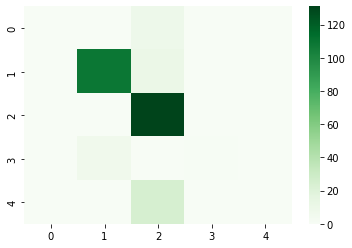

In [30]:
sns.heatmap(confusion_matrix,cmap='Greens')